# Image load

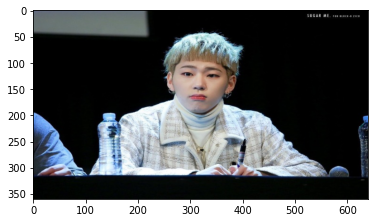

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os

my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/zico.jpg'
#opencv로 이미지를 읽기
img_bgr = cv.imread(my_image_path)
#image resize
img_bgr = cv.resize(img_bgr, (640, 360))
#opencv는 BGR순으로 사용. RGB로 바꿔줘야함
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
#출력용 이미지 별도 보관
img_show = img_bgr.copy()
#이미지 출력
plt.imshow(img_rgb)
plt.show()

# Face landmark

rectangles[[(275, 96) (364, 186)]]


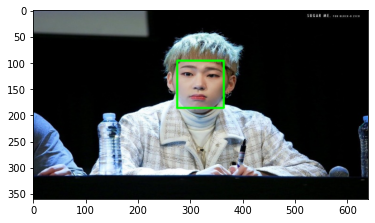

In [7]:
import dlib

#detector 선언
detector_hog = dlib.get_frontal_face_detector()   

img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
#(image, num of img pyramid)
dlib_rects = detector_hog(img_rgb, 1)   

# 찾은 얼굴영역 좌표
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv.LINE_AA)

img_show_rgb =  cv.cvtColor(img_show, cv.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

68


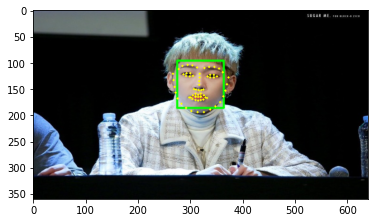

In [8]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'

#RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))


for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv.cvtColor(img_show, cv.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 얼굴 좌표 구하기

In [9]:
#얼굴 좌표
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(317, 142)
(x,y) : (317,97)
(w,h) : (90,90)


In [12]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/king.png'
img_sticker = cv.imread(sticker_path)
img_sticker = cv.resize(img_sticker, (w,h))
print (img_sticker.shape)

(90, 90, 3)


In [13]:
refined_x = x - w // 2  # left
refined_y = y - h       # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (272,7)


In [15]:
refined_y = 0
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (272,0)


# np.where 사용하여 스티커 붙이기

In [16]:
sticker_area = img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

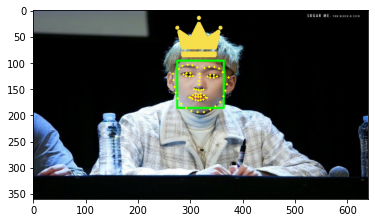

In [18]:
plt.imshow(cv.cvtColor(img_show, cv.COLOR_BGR2RGB))
plt.show()

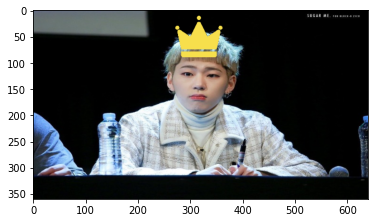

In [20]:
sticker_area = img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB))
plt.show()